In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('C:/Users/sagi9/Desktop/train.csv')

In [54]:
df.head()
df.describe()

,id,article,highlights
count,287113,287113,287113
unique,287113,284005,282197
top,0001d1afc246a7964130f43ae940af6bc6c57f01,(CNN) -- Dubai could lose its place on the Wom...,This page includes the show Transcript and the...
freq,1,3,83


<h1> Preprocessing of Text

In [4]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [5]:
#Loading the data set
text_data = df["article"]
text_data

0         By . Associated Press . PUBLISHED: . 14:11 EST...
1         (CNN) -- Ralph Mata was an internal affairs li...
2         A drunk driver who killed a young woman in a h...
3         (CNN) -- With a breezy sweep of his pen Presid...
4         Fleetwood are the only team still to have a 10...
                                ...                        
287108    By . James Rush . Former first daughter Chelse...
287109    An apologetic Vanilla Ice has given his first ...
287110    America's most lethal sniper claimed he wished...
287111    By . Sara Malm . PUBLISHED: . 12:19 EST, 8 Mar...
287112    (CNN)Former Florida Gov. Jeb Bush has decided ...
Name: article, Length: 287113, dtype: object

In [6]:
# Download NLTK resources
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sagi9\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\sagi9\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\sagi9\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\sagi9\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [7]:
stop_words = set(stopwords.words('english'))
#Adding additional stop words that is frequent but unnecessary in the article
stop_words.add('said')
stop_words.add('cnn')
stop_words

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'cnn',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'o

In [8]:
#Intialise the lemmatizer Lemmatization is a text pre-processing technique used 
#in natural language processing (NLP) models to break a word down to its root meaning to identify similarities
lemmatizer = WordNetLemmatizer()
lemmatizer

<WordNetLemmatizer>

In [11]:
#Preprocessing step before topic modelling by tokenizing, remove unnecesaary words, punctuations and finding all the root of word by lemmatizing 
def preprocess(text):
    
    #Applying tokenizer breaking down the article into individual tokens
    tokens = word_tokenize(text)
    
    #Exclude all the punctuations and alphanumeric numbers in our preprocessing
    tokens = [token.lower() for token in tokens if token.isalpha()]
    
    #Remove all the stopwords from the tokens by checking if each token is inside the stop_words sets.
    tokens = [token for token in tokens if token not in stop_words]
    
    #Lematizing by finding the root or a word
    tokens = [lemmatizer.lemmatize(token) for token in tokens]
    
    #Remove words less than three letter
    tokens = [token for token in tokens if len(token) >= 3]
    
    return tokens

In [14]:
#Preprocessing Function Takes ~30 min to run

In [12]:
preprocessedData = text_data.apply(preprocess)

In [15]:
preprocessedData

0         [associated, press, published, est, october, u...
1         [ralph, mata, internal, affair, lieutenant, po...
2         [drunk, driver, killed, young, woman, crash, c...
3         [breezy, sweep, pen, president, vladimir, puti...
4         [fleetwood, team, still, record, sky, bet, lea...
                                ...                        
287108    [james, rush, former, first, daughter, chelsea...
287109    [apologetic, vanilla, ice, given, first, prope...
287110    [america, lethal, sniper, claimed, wished, ira...
287111    [sara, malm, published, est, march, updated, e...
287112    [former, florida, gov, jeb, bush, decided, act...
Name: article, Length: 287113, dtype: object

<h1> Tuning Hyperparameters of LDA Model by Comparing Coherence Scores for Different Numbers of Topics

In [19]:
import gensim
import gensim.corpora as corpora
from gensim.models import CoherenceModel

id2word = corpora.Dictionary(preprocessedData)
corpus = [id2word.doc2bow(text) for text in preprocessedData]

In [21]:
#Function to generate the coherence score given the num of topics to model the preprocessedData over
def LDA_CoherenceScore(num_topics):
    lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus, id2word=id2word, num_topics=num_topics, random_state=27)
    coherenceModel = CoherenceModel(model=lda_model, texts=preprocessedData, dictionary=id2word, coherence='c_v')
    coherenceScore = coherenceModel.get_coherence()
    print(f'The Coherence Score for {num_topics} number of topics is {coherenceScore}')

In [62]:
#Each coherence score calculation takes around 20 min to run.

In [23]:
LDA_CoherenceScore(8)

The Coherence Score for 8 number of topics is 0.4049214592448707


In [24]:
LDA_CoherenceScore(9)

The Coherence Score for 9 number of topics is 0.4166145750587481


In [25]:
LDA_CoherenceScore(10)

The Coherence Score for 10 number of topics is 0.41914998775659285


In [26]:
LDA_CoherenceScore(11)

The Coherence Score for 11 number of topics is 0.4335880713169365


In [27]:
LDA_CoherenceScore(12)

The Coherence Score for 12 number of topics is 0.44453938649652525


In [29]:
LDA_CoherenceScore(15)

The Coherence Score for 15 number of topics is 0.4835836530303332


In [32]:
LDA_CoherenceScore(20)

The Coherence Score for 20 number of topics is 0.5009437008624718


In [30]:
LDA_CoherenceScore(25)

The Coherence Score for 25 number of topics is 0.5301936021654649


In [58]:
LDA_CoherenceScore(30)

The Coherence Score for 30 number of topics is 0.5427716850921167


In [31]:
LDA_CoherenceScore(35)

The Coherence Score for 35 number of topics is 0.5345319876316315


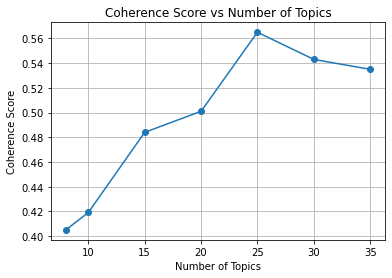

In [60]:
import matplotlib.pyplot as plt

# Data points
num_topics = [8, 10, 15, 20, 25, 30, 35]
coherence_scores = [0.405, 0.4191, 0.484, 0.501, 0.565, 0.543, 0.535]

# Plotting the curve graph
plt.plot(num_topics, coherence_scores, marker='o')
plt.xlabel('Number of Topics')
plt.ylabel('Coherence Score')
plt.title('Coherence Score vs Number of Topics')
plt.grid()

# Display the plot
plt.show()

<h1>Building of LDA Model

In [33]:
from sklearn.feature_extraction.text import CountVectorizer

In [34]:
# Convert preprocessed tokens back into strings
preprocessedText = preprocessedData.apply(' '.join)
preprocessedText

0         associated press published est october updated...
1         ralph mata internal affair lieutenant police d...
2         drunk driver killed young woman crash checking...
3         breezy sweep pen president vladimir putin wrot...
4         fleetwood team still record sky bet league one...
                                ...                        
287108    james rush former first daughter chelsea clint...
287109    apologetic vanilla ice given first proper inte...
287110    america lethal sniper claimed wished iraqi des...
287111    sara malm published est march updated est marc...
287112    former florida gov jeb bush decided actively e...
Name: article, Length: 287113, dtype: object

In [35]:
vectorizer = CountVectorizer()

In [37]:
documentTermMatrix = vectorizer.fit_transform(preprocessedText)

In [48]:
import pandas as pd
from sklearn.decomposition import LatentDirichletAllocation


numOfTopics = 25

# Initialize LDA model
ldaModel = LatentDirichletAllocation(n_components = numOfTopics, random_state=27)

# Fit the LDA model to the document-term matrix
ldaModel.fit(documentTermMatrix)

LatentDirichletAllocation(n_components=25, random_state=27)

In [42]:
# Get the topic-word distributions and normalising the LDA model
topicWordDistributions = ldaModel.components_ / ldaModel.components_.sum(axis=1)[:, None]

# Get the feature names (words) from the vectorizer that is used to create the matrix
feature_names = vectorizer.get_feature_names()

# Print the top 20 words for each topic
n_top_words = 20
for topicIndex, topic in enumerate(topicWordDistributions):
    print(f"Topic {topicIndex + 1}:")
    print(" ".join([feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]]))
    print("\n")

Topic 1:
hospital doctor patient cancer treatment medical day surgery health would life condition told could year time care week baby month


Topic 2:
new one prince year london hotel also look royal queen dress fashion art show model first world woman collection day


Topic 3:
obama president state would republican house party election political new american vote government campaign year clinton white country bill congress


Topic 4:
home house dog fire property year family building one found two owner would area est local left could died garden


Topic 5:
minister would cameron party labour china prime government last people bbc britain david former chinese british also right year leader


Topic 6:
show film star year new time one movie first fan actor like music also love would last york song best


Topic 7:
company new million year also apple business sale device phone customer technology bank market firm could google store money one


Topic 8:
court case year judge told prison pol

<h1> Visualising Topic Modelling Result Using Word Cloud

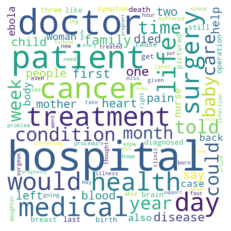

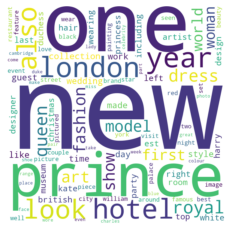

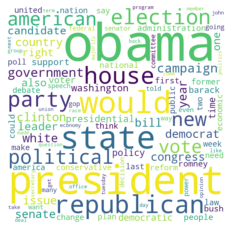

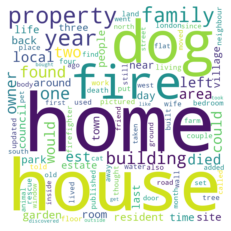

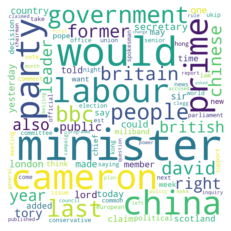

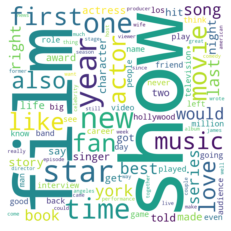

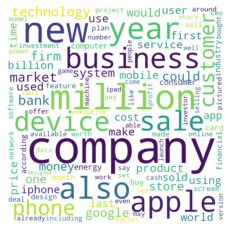

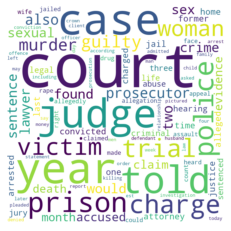

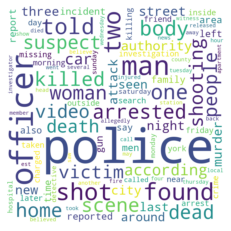

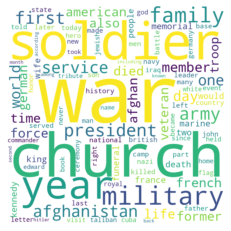

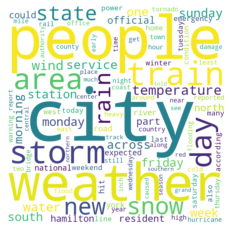

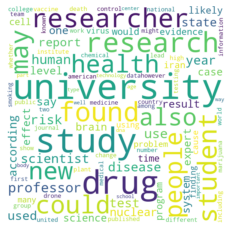

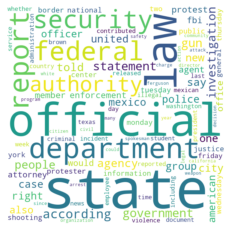

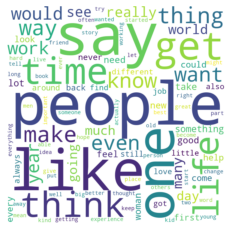

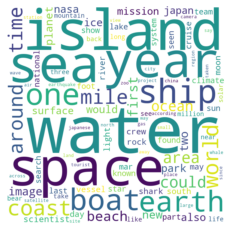

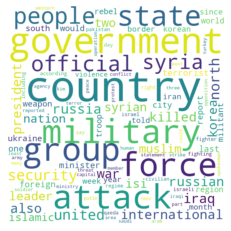

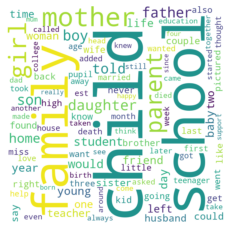

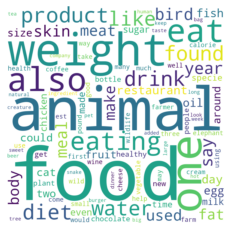

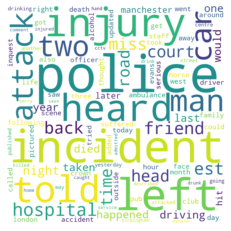

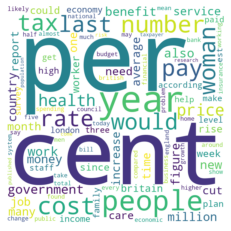

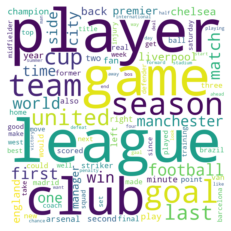

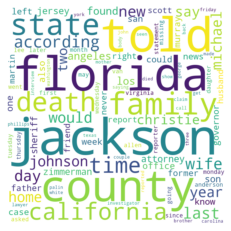

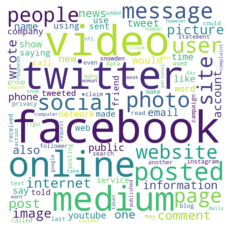

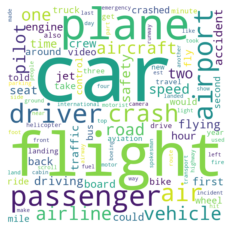

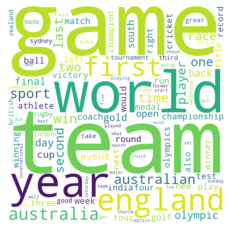

In [57]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import os

def generate_wordcloud_for_topic(topicIndex, topicWordDistributions, feature_names, output_dir='wordclouds'):
    
    
    topic_words = {feature_names[i]: topicWordDistributions[topicIndex, i] for i in range(len(feature_names))}
    wordcloud = WordCloud(width=800, height=800, background_color='white', max_words=100)
    wordcloud.generate_from_frequencies(topic_words)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()
    
    # Save the word cloud to a file
    #if not os.path.exists(output_dir):
    #    os.makedirs(output_dir)
    #output_file = os.path.join(output_dir, f'topic_{topicIndex + 1}.png')
    #wordcloud.to_file(output_file)

# Generate and save word clouds for each topic
numOfTopics = 25
for topicIndex in range(numOfTopics):
    generate_wordcloud_for_topic(topicIndex, topicWordDistributions, feature_names)
